In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2-4*x+5

In [5]:
f(3.0)

20.0

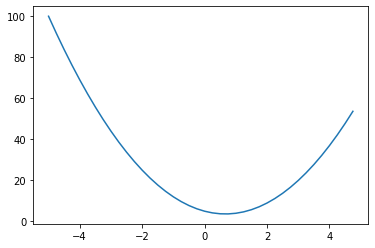

In [6]:
xs = np.arange(-5,5,0.25)
ys=f(xs)
plt.plot(xs, ys)

In [7]:
h=0.00000001
x =-3.0
(f(x+h)-f(x))/h

-22.00000039920269

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [9]:
h =0.0001

#inputs
a = 2.0
b=-3.0
c=10.0

d1 = a*b+c
a+=h
d2 = a*b+c
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [20]:
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data,(self, other),'-')
        return out

    def __mul__(self, other):
        out = Value(self.data*other.data,(self, other),'*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c= Value(10.0, label ='c')
e = a*b; e.label='e'
d=e+c; d.label ='d'
f= Value(-2.0, label='f')
L = d*f; L.label='L'
d._prev
a+b
a*b

Value(data=-6.0)

In [11]:
L

Value(data=-8.0)

In [12]:
d._op

'+'

In [13]:
!pip install graphviz


In [14]:
from graphviz import Digraph

In [15]:



def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)

    build(root)
    return nodes, edges

In [16]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={
        'rankdir':'LR' #LR = left to right
     })

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, crate a rectagular ['record'] node for it
        dot.node(name = uid, label = "{ %s| data %.4f}" % (n.label,n.data ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid+n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid+n._op, uid)
        
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+n2._op)

    return dot


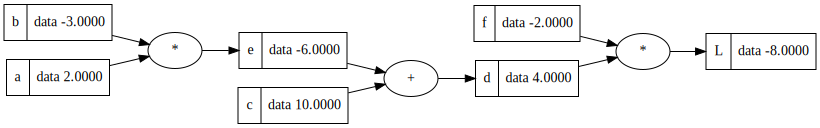

In [17]:
draw_dot(L)

In [18]:
print(draw_dot(L))

digraph {
	graph [rankdir=LR]
	4463266304 [label="{ d| data 4.0000}" shape=record]
	"4463266304+" [label="+"]
	"4463266304+" -> 4463266304
	4519672944 [label="{ b| data -3.0000}" shape=record]
	4519671984 [label="{ e| data -6.0000}" shape=record]
	"4519671984*" [label="*"]
	"4519671984*" -> 4519671984
	4463265968 [label="{ f| data -2.0000}" shape=record]
	4519158496 [label="{ a| data 2.0000}" shape=record]
	4463264480 [label="{ L| data -8.0000}" shape=record]
	"4463264480*" [label="*"]
	"4463264480*" -> 4463264480
	4519672800 [label="{ c| data 10.0000}" shape=record]
	4519158496 -> "4519671984*"
	4463266304 -> "4463264480*"
	4519672800 -> "4463266304+"
	4463265968 -> "4463264480*"
	4519671984 -> "4463266304+"
	4519672944 -> "4519671984*"
}



In [23]:
def lol():
    h = 0.0001;
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c= Value(10.0, label ='c')
    e = a*b; e.label='e'
    d=e+c; d.label ='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c= Value(10.0, label ='c')
    e = a*b; e.label='e'
    d=e+c; d.label ='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol()

6.000000000021544
